# Картирование Марса в ИК диапазоне

## Введение

Прибор OMEGA на Mars Express - это изображающей спектрометр ИК диапазона (0.3 мкм - 5 мкм). Такой спектрометр позволяет получить изображения Марса на разных длиннах волн. Так как разные вещества отражают по разному, это позволяет (почти) однозначно описать состав поверхности, например минералогический состав и отличать водяной лед от CO$_2$ льда.

## Датасет

Данные находятся в `.mat` файлах, их можно загрузить следующим образом:

In [198]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

example = sio.loadmat('data/ORB2902_1.mat', squeeze_me=True)
example1 = sio.loadmat('data/ORB3023_0.mat', squeeze_me=True)

example

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Feb 15 19:13:01 2024',
 '__version__': '1.0',
 '__globals__': [],
 'lat': array([[47.9947, 47.9539, 48.0959, ..., 49.4454, 49.4491, 49.4533],
        [48.0522, 48.1201, 48.1599, ..., 49.5209, 49.5254, 49.5287],
        [48.1216, 48.2008, 48.241 , ..., 49.5964, 49.6002, 49.604 ],
        ...,
        [47.8186, 47.8337, 47.851 , ..., 48.3759, 48.3767, 48.3834],
        [47.7549, 47.7699, 47.7872, ..., 48.3139, 48.3141, 48.3186],
        [47.6889, 47.7077, 47.7215, ..., 48.2452, 48.2493, 48.2542]]),
 'lon': array([[132.6319, 132.8092, 132.1751, ..., 120.6434, 120.4562, 120.2155],
        [132.7205, 132.416 , 132.2382, ..., 120.6463, 120.4323, 120.2449],
        [132.7586, 132.4031, 132.2251, ..., 120.6493, 120.4618, 120.2474],
        ...,
        [280.4507, 280.5711, 280.6916, ..., 286.0542, 286.1529, 286.2507],
        [280.4614, 280.5816, 280.7019, ..., 286.0549, 286.1535, 286.2514],
        [280.472 , 280.6041, 280.

В данных лежат следующие значения:
- `lat`: широта пикселя
- `lon`: долгота пикселя
- `wavelength`: длина волны в микрометрах
- `data`: отражение на каждой длине волны в каждом пиксее. Размер массива `количество пикселей икс x количество пикселей игрек x длина волны`. Настоятельно рекомендуется смотреть данные до 3 мкм, далее есть артефакты (`mask = wavelength < 3`).
- `incidence`: угол падения солнечного света, градусы. `incidence > 90` - ночные данные, их нет смысла смотреть
- `ls`: [сезон на Марсе](https://www-mars.lmd.jussieu.fr/mars/time/solar_longitude.html), измеряется от 0 до 360

# Что нужно сделать?

Попробуйте извлечь из этих данных максимум информации или написать полезные инструменты для ее обработки!

Статьи по данным OMEGA можно найти [здесь](https://ui.adsabs.harvard.edu/search/fq=%7B!type%3Daqp%20v%3D%24fq_database%7D&fq_database=(database%3Aastronomy%20OR%20database%3Aphysics)&q=%20abs%3A%22Mars%22%20%20abs%3A%22OMEGA%22%20%20property%3Arefereed&sort=citation_count%20desc%2C%20bibcode%20desc&p_=0). Примеры интересных вещей:
- Построить карту отражения по данным на длине волны 1 мкм в обычных координатах
- Построить карту отражения по данным на длине волны 1 мкм в полярных координатах (см. полюса)
- Нарисовать спектры из разных точек поверхности (отобразив точку на карте)
- Показать чем отличаются спектры разных поверхностей на Марсе (можно свериться [с данными CRISM/MRO](https://crismtypespectra.rsl.wustl.edu/))
- Построить карту глубины полосы поглощения водяного льда согласно формуле (более подробно в [статье]( https://doi.org/10.1029/2010JE003762), там же формула для CO$_2$ льда и примерные результаты): 
$$
H_2O = 1 - \frac{R_{1.5}}{(R_{1.385}^{0.7}R_{1.772}^{0.3})}
$$
- Построить распредление минералов
- Попробовать обработать сырые данные с помощью [omega_py](https://github.com/AStcherbinine/omegapy). Сырые данные можно найти на [PSA](https://psaftp.esac.esa.int/#/MARS-EXPRESS/OMEGA/)

C:\Users\Nikita\AppData\Local\Temp\ipykernel_11624\1840119467.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(example['lon'], example['lat'], example['data'][:,:,index], cmap='gray')
C:\Users\Nikita\AppData\Local\Temp\ipykernel_11624\1840119467.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(example1['lon'], example1['lat'], example1['data'][:,:,index], cmap='gray')


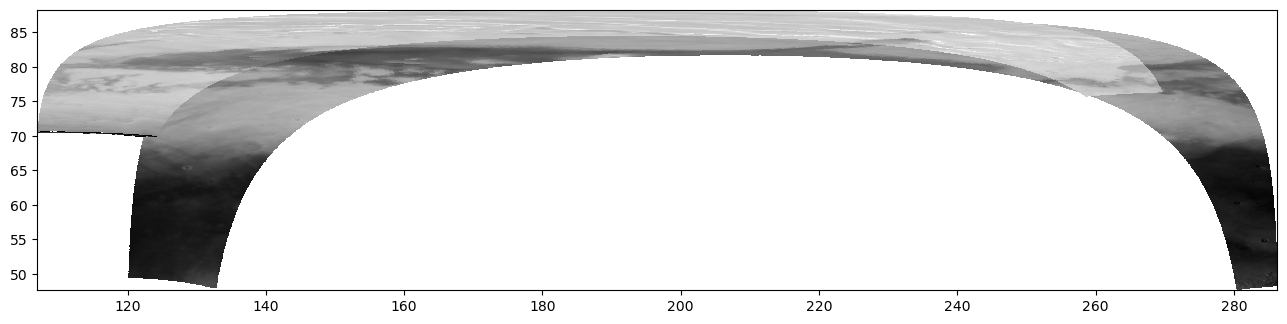

In [211]:
data = example['data']
wavelength = example['wavelength']
index = int (np.where(wavelength == 1.04071)[0][0]) # index=68

value_1mkm = data [:,:,index] 
value_1mkm[np.isnan(value_1mkm)] = 999

plt.figure(figsize=(16,8))
plt.pcolormesh(example['lon'], example['lat'], example['data'][:,:,index], cmap='gray') 
plt.pcolormesh(example1['lon'], example1['lat'], example1['data'][:,:,index], cmap='gray')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# --- рабочий код выше ---

# Оценивание

- 12 баллов: техническая сложность
- 8 баллов: оформление + ридми на гитхабе